# Product Recommendation System
Menggunakan Kumpulan Data Penjualan Amazon

Notebook ini menguraikan sistem rekomendasi produk berdasarkan kumpulan data penjualan Amazon.

## 1. Import Libraries
Mulai dengan mengimpor library yang diperlukan.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import TruncatedSVD
from scipy.sparse import csr_matrix
from sklearn.decomposition import TruncatedSVD

## 2. Load Dataset
Pada tahap ini, data diimpor dari sumber eksternal. Kami memuat dataset Amazon Sales yang berisi informasi mengenai berbagai produk, termasuk deskripsi, harga, dan rating.

In [2]:
# Load the dataset
file_path = '/content/amazon.csv'  # Replace with your actual dataset path
df = pd.read_csv(file_path)
df.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


In [3]:
df.shape

(1465, 16)

## 3. Eksplorasi Data
Di tahap eksplorasi data, kami meninjau struktur dataset untuk memahami fitur yang tersedia. Kami memeriksa beberapa atribut seperti product_id, product_name, category, discounted_price, actual_price, rating, about_product, dll. Tahapan ini juga melibatkan identifikasi jumlah entri yang ada dan mengamati distribusi data.

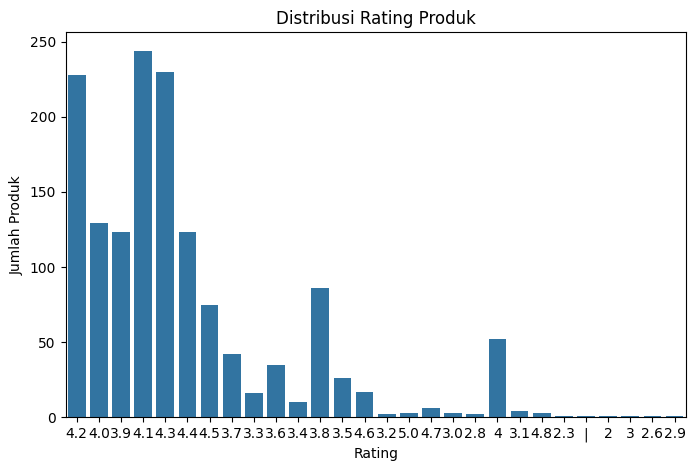

In [4]:
# Distribusi rating produk
plt.figure(figsize=(8, 5))
sns.countplot(x='rating', data=df)
plt.title("Distribusi Rating Produk")
plt.xlabel("Rating")
plt.ylabel("Jumlah Produk")
plt.show()

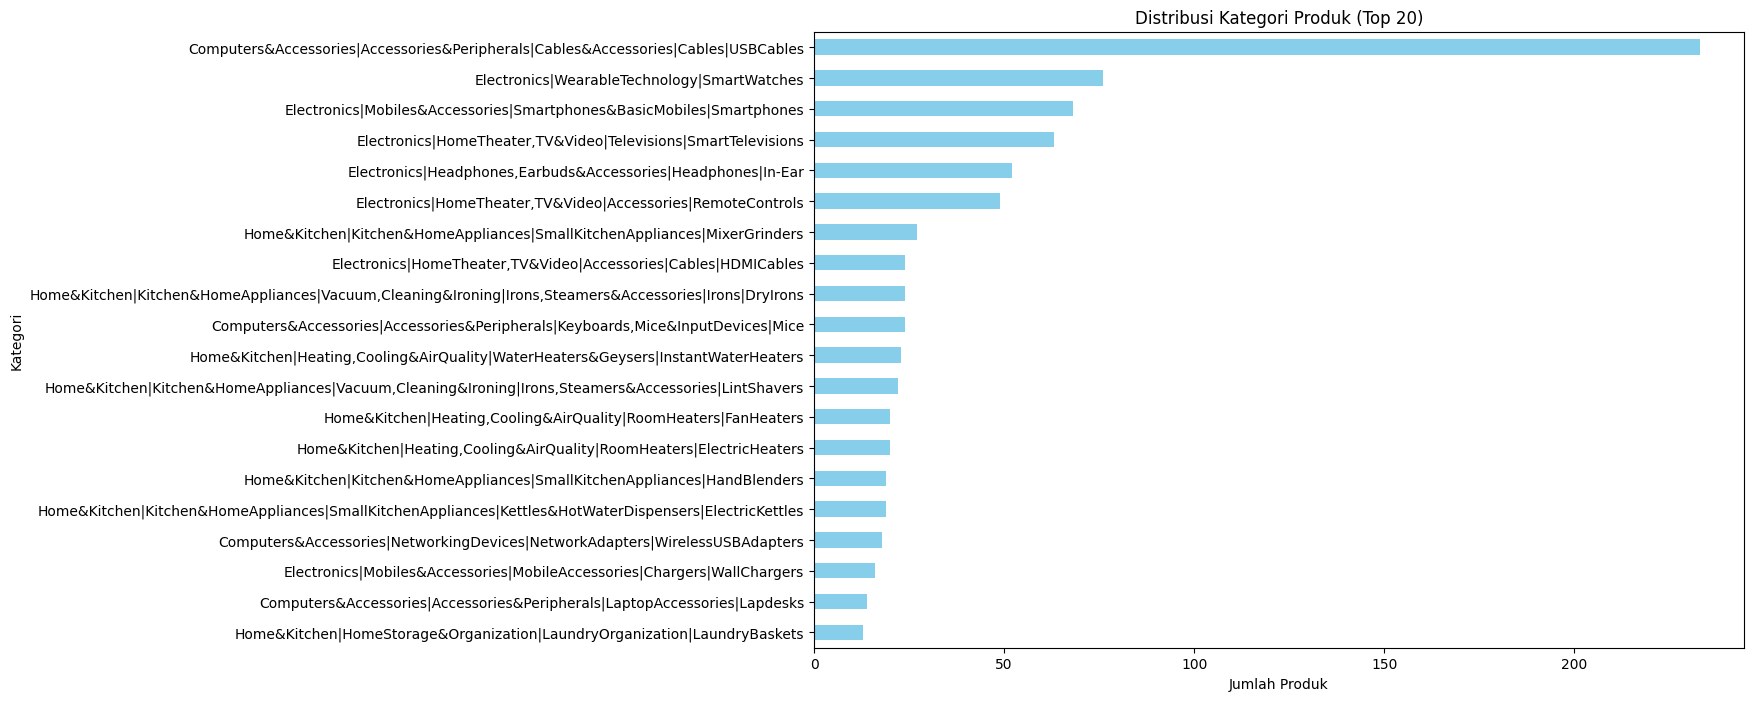

In [5]:
# Menghitung jumlah produk per kategori
category_counts = df['category'].value_counts()

# Memilih hanya kategori teratas (misalnya, 20 teratas)
top_categories = category_counts.head(20)

# Membuat plot
plt.figure(figsize=(12, 8))
top_categories.plot(kind='barh', color='skyblue')
plt.title("Distribusi Kategori Produk (Top 20)")
plt.xlabel("Jumlah Produk")
plt.ylabel("Kategori")
plt.gca().invert_yaxis()  # Menempatkan kategori dengan jumlah tertinggi di atas
plt.show()

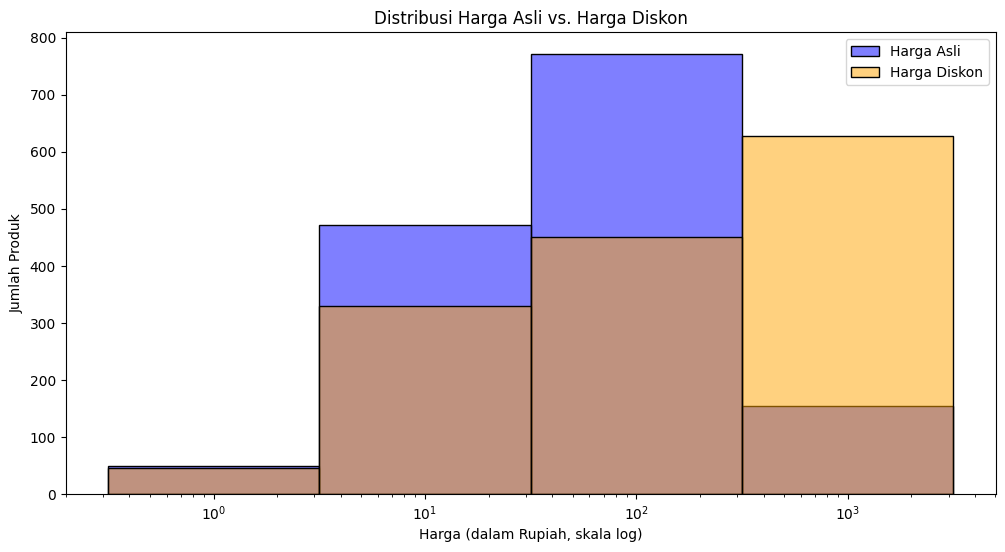

In [6]:
# Plot dengan Skala Logaritmik
plt.figure(figsize=(12, 6))
sns.histplot(df['actual_price'], color='blue', kde=True, bins=50, log_scale=(True, False), label='Harga Asli')
sns.histplot(df['discounted_price'], color='orange', kde=True, bins=50, log_scale=(True, False), label='Harga Diskon')
plt.title("Distribusi Harga Asli vs. Harga Diskon")
plt.xlabel("Harga (dalam Rupiah, skala log)")
plt.ylabel("Jumlah Produk")
plt.legend()
plt.show()

## 3. Data Preprocessing
Dalam tahap ini, data dipersiapkan agar dapat digunakan pada model:

1. Handling Duplicates: Menghapus data duplikat yang mungkin terdapat dalam dataset.

2. Handling Missing Values: Mengatasi nilai kosong dengan cara tertentu, misalnya menghapus entri yang tidak lengkap.

3. Feature Extraction (TF-IDF): Mengubah teks dalam kolom about_product menjadi representasi numerik menggunakan TF-IDF Vectorizer untuk menangkap informasi penting dari deskripsi produk.

In [7]:
df.isnull().sum()

,0
product_id,0
product_name,0
category,0
discounted_price,0
actual_price,0
discount_percentage,0
rating,0
rating_count,2
about_product,0
user_id,0


In [8]:
# Dropping duplicates and handling missing values
df.drop_duplicates(subset='product_id', inplace=True)
df.fillna('', inplace=True)
df = df[['product_id', 'product_name', 'category', 'discounted_price', 'actual_price', 'discount_percentage',
         'rating', 'rating_count', 'about_product', 'review_title', 'review_content']]
df.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,review_title,review_content
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a..."
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou..."
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"As good as original,Decent,Good one for second...","Bought this instead of original apple, does th..."


In [9]:
# Applying TF-IDF Vectorizer
tfidf = TfidfVectorizer(stop_words='english', max_features=5000)
tfidf_matrix = tfidf.fit_transform(df['about_product'])  # 'about_product' sebagai kolom fitur teks
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

## 5. Membangun Model Sistem Rekomendasi
Tahapan ini meliputi pembuatan model rekomendasi:

1. Cosine Similarity: Digunakan untuk mengukur kesamaan antara deskripsi produk dengan mencari nilai kesamaan antar vektor deskripsi about_product.

2. Rekomendasi Produk: Berdasarkan kesamaan yang dihitung, model akan mengembalikan sejumlah produk teratas (top N) yang paling mirip dengan produk yang dipilih pengguna.

In [10]:
# Cosine Similarity
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Recommendation Function with Added Index Check
def recommend_products(product_id, num_recommendations=5):
    # Pastikan `product_id` ada dalam dataset
    if product_id not in df['product_id'].values:
        print(f"Product ID {product_id} not found in the dataset.")
        return pd.DataFrame()  # Return an empty DataFrame

    idx = df.index[df['product_id'] == product_id][0]

    # Ensure the index is within the bounds of cosine_sim matrix
    if idx >= cosine_sim.shape[0]:
        print(f"Index {idx} out of bounds for cosine similarity matrix.")
        return pd.DataFrame()

    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:num_recommendations+1]
    product_indices = [i[0] for i in sim_scores if i[0] < len(df)]

    return df[['product_id', 'product_name', 'about_product', 'discounted_price', 'rating']].iloc[product_indices]

## 6. Percobaan Rekomendasi

Pada bagian ini, kami melakukan percobaan top-N rekomendasi untuk produk tertentu. Input berupa product_id, dan hasil yang ditampilkan meliputi daftar produk yang direkomendasikan berdasarkan kesamaan atribut about_product. Setiap produk rekomendasi dilengkapi dengan product_id dan about_product untuk membantu pengguna memahami alasan rekomendasi.

In [11]:
# Example Recommendation
recommend_products(product_id='B098NS6PVG')  # Replace 'example_id' with an actual product_id

,product_id,product_name,about_product,discounted_price,rating
17,B082LSVT4B,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,"Compatible with all Type C enabled devices, be...",₹249,4.0
54,B0BFWGBX61,Ambrane Unbreakable 3A Fast Charging Braided T...,"Compatible with all Type C enabled devices, be...",₹199,4.1
9,B082LZGK39,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Universal Compatibility – It is compatible wit...,₹199,4.0
163,B0B3RHX6B6,Ambrane BCL-15 Lightning Cable for Smartphone ...,Upto 15W Fast Charging - Supports upto 15W fas...,₹149,3.9
237,B0B5F3YZY4,Wayona 3in1 Nylon Braided 66W USB Fast Chargin...,[3 in 1 Fast Charging Cable] : 3 in 1 Multi Ch...,₹449,4.0


## 7. Evaluasi Model
Untuk mengukur performa model rekomendasi, kami menggunakan metrik evaluasi seperti:

1. Precision@K: Mengukur proporsi rekomendasi yang relevan di antara K rekomendasi teratas.
2. Recall@K: Mengukur cakupan rekomendasi terhadap semua produk yang relevan.
3. MAP@5 : Mengukur seberapa akurat sistem rekomendasi Anda dalam menempatkan item yang relevan di antara 5 rekomendasi teratas, dirata-ratakan di beberapa kueri atau pengguna.

Metrik ini membantu kami memahami seberapa baik rekomendasi yang diberikan model dalam mencakup produk yang relevan.


In [25]:
def precision_at_k(recommended_items, relevant_items, k):
  """Menghitung Precision@K."""
  recommended_k = recommended_items[:k]
  num_relevant_recommended = len(set(recommended_k) & set(relevant_items))
  return num_relevant_recommended / k if k > 0 else 0

def recall_at_k(recommended_items, relevant_items, k):
  """Menghitung Recall@K."""
  recommended_k = recommended_items[:k]
  num_relevant_recommended = len(set(recommended_k) & set(relevant_items))
  return num_relevant_recommended / len(relevant_items) if len(relevant_items) > 0 else 0

def average_precision_at_k(recommended_items, relevant_items, k):
  """Menghitung Average Precision@K."""
  precisions = [precision_at_k(recommended_items, relevant_items, i + 1)
                for i in range(min(len(recommended_items),k)) if recommended_items[i] in relevant_items]
  return sum(precisions) / len(precisions) if len(precisions) > 0 else 0

def mean_average_precision(product_ids, k=5):
  """Menghitung Mean Average Precision (MAP) untuk beberapa product_id."""
  average_precisions = []
  for product_id in product_ids:
    relevant_items = df[df['rating'] >= 4]['product_id'].tolist()
    recommended_items = recommend_products(product_id, num_recommendations=k)['product_id'].tolist()

    avg_precision = average_precision_at_k(recommended_items, relevant_items, k)
    average_precisions.append(avg_precision)

  return sum(average_precisions) / len(average_precisions) if len(average_precisions) > 0 else 0


In [24]:
product_id_example = 'B098NS6PVG'
k = 5
relevant_items = df[df['rating'] >= 4]['product_id'].tolist()
recommended_items = recommend_products(product_id_example, num_recommendations=k)['product_id'].tolist()

precision = precision_at_k(recommended_items, relevant_items, k)
recall = recall_at_k(recommended_items, relevant_items, k)

print(f"Precision@{k}: {precision:.2f}")
print(f"Recall@{k}: {recall:.2f}\n")

Precision@5: 0.80
Recall@5: 0.00



In [26]:
# Menghitung dan menampilkan Mean Average Precision (MAP)
num_samples = 10  # Jumlah sampel product_id
sample_product_ids = df['product_id'].sample(num_samples).tolist()
map_at_k = mean_average_precision(sample_product_ids, k=5)
print(f"Mean Average Precision@5 (untuk {num_samples} sampel): {map_at_k:.2f}")

Mean Average Precision@5 (untuk 10 sampel): 0.85
